### Impact of Zero Emision Vehicle (ZEV) Adoption on Traditional Fuel Types and Chargers in California

In light of the consistent year-over-year growth in the adoption of Zero Emission Vehicles (ZEVs) under the purview of the Energy Commission, we seek to analyze the consequential impact on traditional fuel consumption, particularly gasoline and diesel. 

We posit that the expanding population of Light-Duty Zero Emission Vehicles (ZEVs) will not only necessitate a proliferation of Public and Private Charging Infrastructure but also induce transformations in the landscape of conventional gas stations. 

Over the course of the next decade, we aim to conduct a data-driven assessment to discern how these changes may render some existing gas stations economically unviable.

    ZEV include: Battery Electric(BEV), Plug-In Hybrid (PHEV), and Fuel Cell (FCEV).
    NON-ZEV include: Diesel, Flex Fuel, Gasoline, Gasoline Hybrid, Natural Gas, and Propane

**Analysis Steps:**
    

1. Calculate the percentage change in the number of ZEV and NON-ZEV vehicles over the years. 
2. Calculate the Total Number of vehicles by Fuel Type to see what is the difference between different fuel types for ZEV and NON-ZEV
3. Calculate the growth of Public and Private Chargers for ZEVs
4. Map where in California ZEV / NON-ZEV vehicles are most popular
5. Map where in California is the highest number of Chargers,, and compare with the Total number of ZEVs

    
Use visualizations such as line charts or scatter plots to illustrate these relationships.


## 1. Libraries Required

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## 2. Import Dataset

In [57]:
zev = pd.read_csv('Energy Commission Zero Emission Vehicle Population in California .csv')
chargers = pd.read_csv("Chargers_California_new.csv")
zev.head()

,Data Year,County,Dashboard Fuel Type Group,Fuel Type,Manufacturer,Model,Number of Vehicles
0,2010,Alameda,Battery Electric (BEV),Battery Electric (BEV),Ford,Ranger,3
1,2010,Alameda,Battery Electric (BEV),Battery Electric (BEV),Tesla,Roadster,17
2,2010,Alameda,Diesel,Diesel,NaN,NaN,10939
3,2010,Alameda,Gasoline,Flex Fuel,NaN,NaN,10974
4,2010,Alameda,Gasoline,Gasoline,NaN,NaN,840577


## 3. Issues/Hypotheses to Explore (Based off Issue Tree)


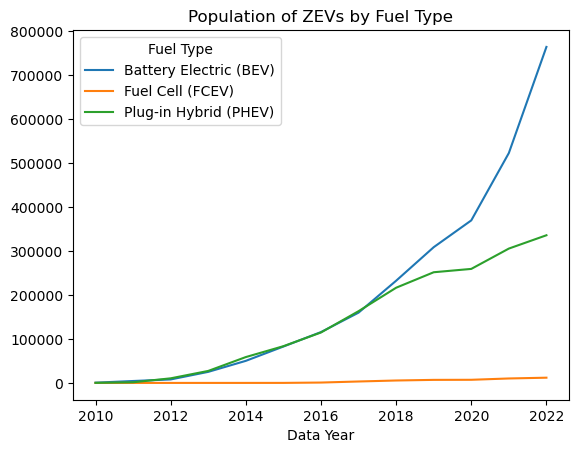

In [58]:
def plot_zev_data(dataframe, selected_fuels):  #FUNCTION
   
    zev_grouped = dataframe[dataframe['Fuel Type'].isin(selected_fuels)]
    
    zev_fuel_type = zev_grouped.groupby(['Fuel Type', 'Data Year'])['Number of Vehicles'].sum().reset_index()
    
    zev_data = zev_fuel_type.pivot(index='Fuel Type', columns='Data Year', values='Number of Vehicles')
    
    zev_data.transpose().plot(kind='line')
    
    # Add a title to the plot
    plt.title('Population of ZEVs by Fuel Type')
    
    # Show the plot
    plt.show()

selected_zev_fuels = ['Battery Electric (BEV)', 'Plug-in Hybrid (PHEV)', 'Fuel Cell (FCEV)']
plot_zev_data(zev, selected_zev_fuels)

C:\Users\tiste\AppData\Local\Temp\ipykernel_13596\3191168831.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zev_fuel_type = zev_grouped.groupby(['Fuel Type', 'Data Year']).sum().reset_index()


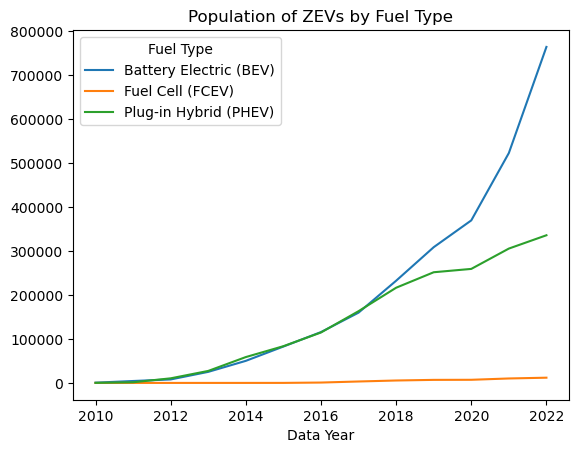

In [3]:
selected_zev_fuels = ['Battery Electric (BEV)', 'Plug-in Hybrid (PHEV)', 'Fuel Cell (FCEV)']
zev_grouped = zev[zev['Fuel Type'].isin(selected_zev_fuels)]

zev_fuel_type = zev_grouped.groupby(['Fuel Type', 'Data Year']).sum().reset_index()
zev_fuel_type = zev_fuel_type[['Data Year', 'Fuel Type', 'Number of Vehicles']]

zev_data = zev_fuel_type.pivot(index='Fuel Type', columns='Data Year', values='Number of Vehicles')

zev_data.transpose().plot (kind='line')
plt.title('Population of ZEVs by Fuel Type')
plt.show()

#2 Sub Plots showing ZEV vs NonZEV

C:\Users\tiste\AppData\Local\Temp\ipykernel_13596\2211036147.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non_zev_fuel_type = non_zev_grouped.groupby(['Fuel Type', 'Data Year']).sum().reset_index()


Text(0.5, 1.0, 'Population of NON-ZEVs by Fuel Type')

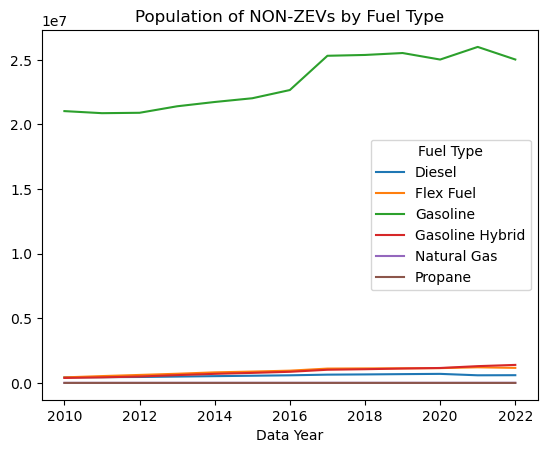

In [55]:
selected_non_zev_fuels = ['Diesel', 'Flex Fuel', 'Gasoline', 'Gasoline Hybrid', 'Natural Gas', 'Propane']
non_zev_grouped = zev[zev['Fuel Type'].isin(selected_non_zev_fuels)]
non_zev_fuel_type = non_zev_grouped.groupby(['Fuel Type', 'Data Year']).sum().reset_index()
non_zev_fuel_type = non_zev_fuel_type[['Data Year', 'Fuel Type', 'Number of Vehicles']]
data = non_zev_fuel_type.pivot(index='Fuel Type', columns='Data Year', values='Number of Vehicles')

data.transpose().plot(kind='line')
plt.title('Population of NON-ZEVs by Fuel Type')

## 2. Calculate the percentage change in the number of ZEV and NON-ZEV vehicles over the years.

In [59]:
zev_grouped['Vehicle Category'] = 'ZEV'
non_zev_grouped['Vehicle Category'] = 'Non-ZEV'

combined_data = pd.concat([zev_grouped, non_zev_grouped], ignore_index=True) ## I concatenate the two dfs vertically to combine them into one
grouped = combined_data.groupby(['Data Year','Vehicle Category'])['Number of Vehicles'].sum().reset_index()

total_zev_vehicles = grouped[grouped['Vehicle Category'] == 'ZEV']['Number of Vehicles'].sum()
total_non_zev_vehicles = grouped[grouped ['Vehicle Category'] == 'Non-ZEV']['Number of Vehicles'].sum()

# Calculated the percentage for each category for each year
grouped['Percentage'] = (grouped['Number of Vehicles'] / grouped.groupby('Data Year')['Number of Vehicles'].transform('sum')) * 100
print(grouped)

    Data Year Vehicle Category  Number of Vehicles  Percentage
0        2010          Non-ZEV            22285362   99.996554
1        2010              ZEV                 768    0.003446
2        2011          Non-ZEV            22282184   99.973632
3        2011              ZEV                5877    0.026368
4        2012          Non-ZEV            22484298   99.918312
5        2012              ZEV               18382    0.081688
6        2013          Non-ZEV            23218126   99.774604
7        2013              ZEV               52451    0.225396
8        2014          Non-ZEV            23790527   99.544020
9        2014              ZEV              108977    0.455980
10       2015          Non-ZEV            24246042   99.319003
11       2015              ZEV              166247    0.680997
12       2016          Non-ZEV            25069658   99.086882
13       2016              ZEV              231025    0.913118
14       2017          Non-ZEV            28092006   98

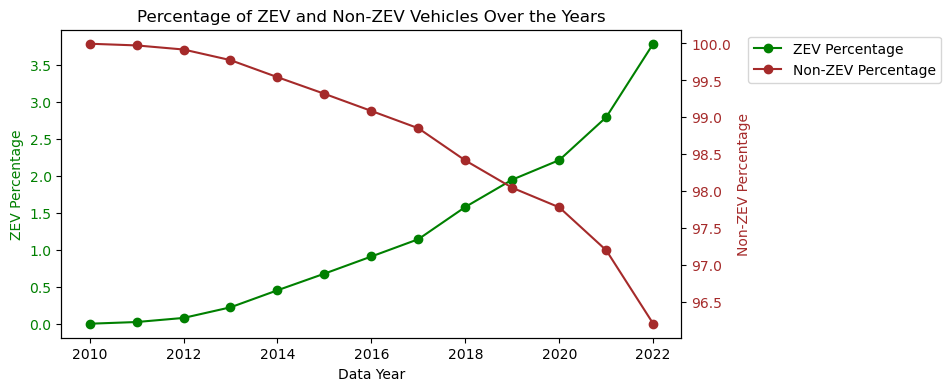

In [60]:
pivot_df = grouped.pivot(index='Data Year', columns='Vehicle Category', values='Percentage')

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(pivot_df.index, pivot_df['ZEV'], marker='o', color='g', label='ZEV Percentage')
ax1.set_xlabel('Data Year')
ax1.set_ylabel('ZEV Percentage', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()

ax2.plot(pivot_df.index, pivot_df['Non-ZEV'], marker='o', color='brown', label='Non-ZEV Percentage')
ax2.set_ylabel('Non-ZEV Percentage', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.43, 1.0))

plt.title('Percentage of ZEV and Non-ZEV Vehicles Over the Years')

plt.show()


## 3. Calculate the Total Number of ZEVs and NON-ZEVs population over the years

In [61]:
vehicles_growth = grouped[['Data Year', 'Vehicle Category', 'Number of Vehicles']]
vehicles_growth

,Data Year,Vehicle Category,Number of Vehicles
0,2010,Non-ZEV,22285362
1,2010,ZEV,768
2,2011,Non-ZEV,22282184
3,2011,ZEV,5877
4,2012,Non-ZEV,22484298
5,2012,ZEV,18382
6,2013,Non-ZEV,23218126
7,2013,ZEV,52451
8,2014,Non-ZEV,23790527
9,2014,ZEV,108977


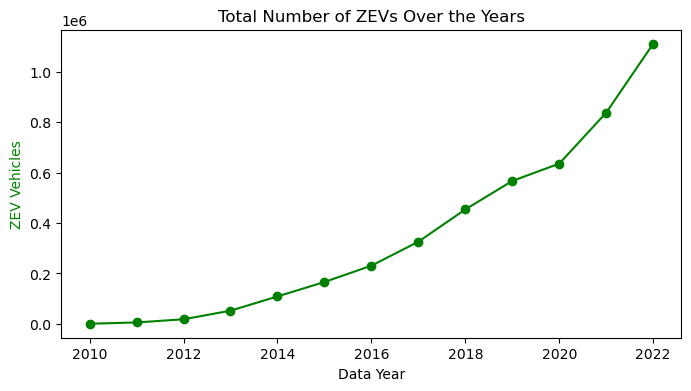

In [62]:
pivot_df = grouped.pivot(index='Data Year', columns='Vehicle Category', values='Number of Vehicles')

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(pivot_df.index, pivot_df['ZEV'], marker='o', color='g', label='ZEV Vehicles')
ax1.set_xlabel('Data Year')
ax1.set_ylabel('ZEV Vehicles', color='g')

lines1, labels1 = ax1.get_legend_handles_labels()

plt.title('Total Number of ZEVs Over the Years')

plt.show()

Text(0.5, 1.0, 'Number of NON-ZEVs Over the Years')

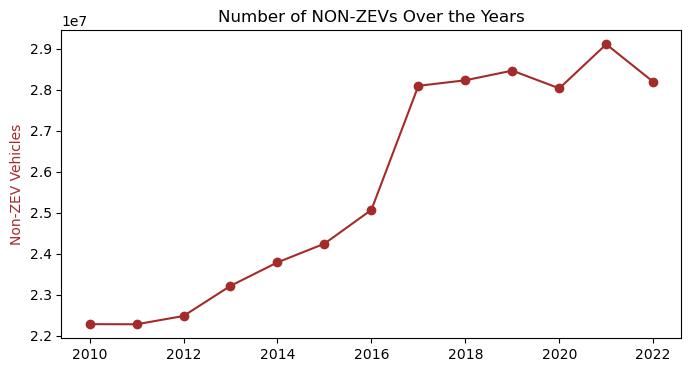

In [63]:
pivot_df = grouped.pivot(index='Data Year', columns='Vehicle Category', values='Number of Vehicles')
fig, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(pivot_df.index, pivot_df['Non-ZEV'], marker='o', color='brown', label='Non-ZEV Vehicles')
ax2.set_ylabel('Non-ZEV Vehicles', color='brown')
plt.title('Number of NON-ZEVs Over the Years')

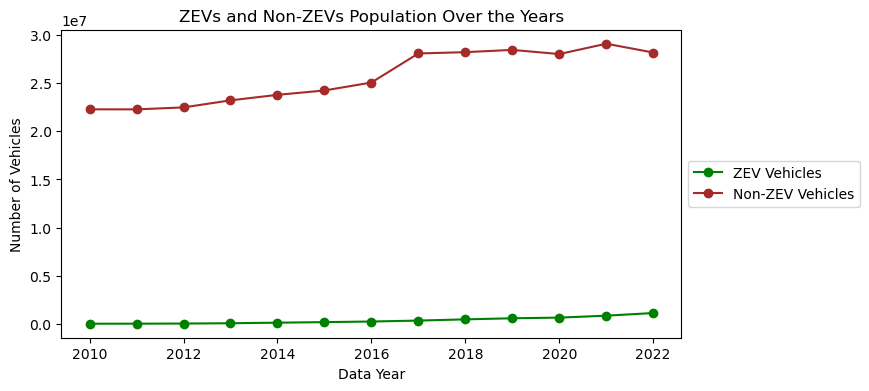

In [64]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(pivot_df.index, pivot_df['ZEV'], marker='o', color='g', label='ZEV Vehicles')
ax.plot(pivot_df.index, pivot_df['Non-ZEV'], marker='o', color='brown', label='Non-ZEV Vehicles')

ax.set_xlabel('Data Year')
ax.set_ylabel('Number of Vehicles')

plt.title('ZEVs and Non-ZEVs Population Over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

## 5. Total number of Chargers 

C:\Users\tiste\AppData\Local\Temp\ipykernel_13596\1594091363.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chargers_grouped = chargers_sorted.groupby("Date").sum().reset_index()


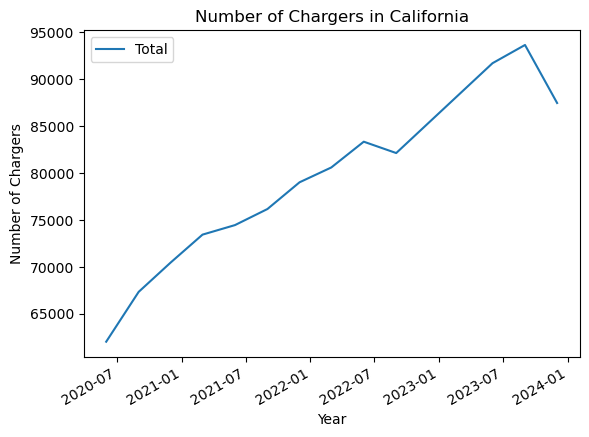

In [65]:
chargers['Date'] = pd.to_datetime(chargers['Date'], format='%m/%d/%Y')

chargers_sorted = chargers.sort_values(by='Date', ascending=False)
chargers_grouped = chargers_sorted.groupby("Date").sum().reset_index()
chargers_grouped.plot(x= "Date", y= "Total", kind= 'line')
plt.xlabel("Year")
plt.ylabel("Number of Chargers")
plt.title('Number of Chargers in California')
plt.show()


In [12]:
chargers.head()

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total,Date
0,Alameda,4,72,1625,2488,398,37,4624,2023-09-01
1,Alpine,0,0,10,0,0,0,10,2023-09-01
2,Amador,0,0,26,0,8,0,34,2023-09-01
3,Butte,6,0,63,55,25,0,149,2023-09-01
4,Calaveras,0,2,9,0,12,0,23,2023-09-01


In [13]:
chargers['Date'] = pd.to_datetime(chargers['Date'], format='%m/%d/%Y')
chargers['Year'] = chargers['Date'].dt.year
chargers_grouped = chargers.groupby('Year')['Total'].sum()
chargers_grouped.head()                                                        

Year
2020    199819
2021    303050
2022    246052
2023    272807
Name: Total, dtype: int64

In [14]:
selected_years = [2020, 2021, 2022, 2023]
selected_category = 'ZEV'

zev_selected_years = vehicles_growth[
    (vehicles_growth['Data Year'].isin(selected_years)) &
    (vehicles_growth['Vehicle Category'] == selected_category)
]
zev_selected_years

,Data Year,Vehicle Category,Number of Vehicles
21,2020,ZEV,635602
23,2021,ZEV,837887
25,2022,ZEV,1111028


In [15]:
conda install --channel conda-forge geopandas
conda install matplotlib

import geopandas as gpd

county_shapes = gpd.read_file('path_to_county_shapefile_or_geojson')
merged_data = county_shapes.merge(zev, on='County', how='left')

import matplotlib.pyplot as plt

# Create a base map
ax = county_shapes.plot(color='white', edgecolor='black')

# Plot numbers on the map
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Number of Vehicles']):
    ax.text(x, y, str(label), fontsize=10, ha='center', va='center')

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Number of Vehicles by County')

# Show the map
plt.show()


SyntaxError: invalid syntax (581969932.py, line 1)

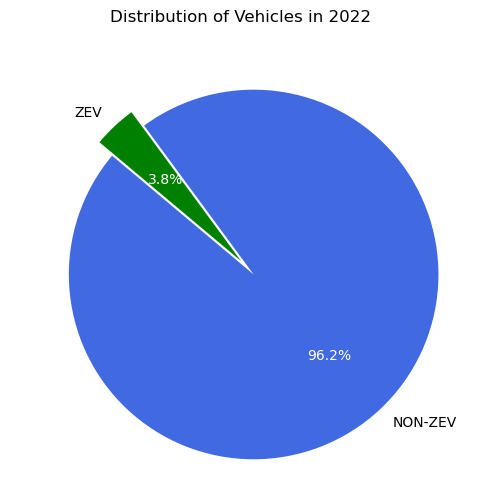

In [45]:
import matplotlib.pyplot as plt

# Data
data = [96.208196, 3.791804]
labels = ['NON-ZEV', 'ZEV']
colors = ['royalblue', 'green']
explode = (0.1, 0)
# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)

for text in texts:
    text.set_color('black')  # Set label text color
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage text color

plt.title('Distribution of Vehicles in 2022')

# Show the chart
plt.show()


In [52]:
# another function

def calculate_total_vehicles(dataframe, county, fuel_type):
    filtered_df = dataframe[(dataframe['County'] == county) & (dataframe['Fuel Type'] == fuel_type)]
    total_vehicles = filtered_df['Number of Vehicles'].sum()
    return total_vehicles

county_of_interest = "Alameda"
fuel_type_of_interest = "Battery Electric (BEV)"

total_vehicles = calculate_total_vehicles(zev_df, county_of_interest, fuel_type_of_interest)
print(f"Total number of vehicles in {county_of_interest} with fuel type {fuel_type_of_interest}: {total_vehicles}")


Total number of vehicles in Alameda with fuel type Battery Electric (BEV): 20



## 4. Insights


In light of the consistent year-over-year growth in the adoption of Zero Emission Vehicles (ZEVs) under the purview of the Energy Commission, we seek to analyze the consequential impact on traditional fuel consumption, particularly gasoline and diesel.
In 2022, there were 28.2 million non-ZEVs and just over 1.1 million ZEVs. 

It is evident that the ZEV population experienced a notable 32% growth in 2022, while the population of traditional fuel vehicles showed signs of deceleration and even reduction, with a 3.14% decrease compared to the previous year.

If the current growth rate of Zero Emission Vehicles (ZEVs) in California continues, it's projected that there will be approximately 2.75 million total electric cars in the state by 2026. However, to achieve the planned expectation of having electric cars make up 35% of the total, California should aim for an estimated 3.14 million electric cars by 2026.
